# A2AR dataset exploration

In [2]:
import json
import os
from os import path

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cycler import cycler
from IPython.display import display
from sklearn.metrics import r2_score, root_mean_squared_error

a2arcolors = ["#FFCEAD", "#AAC5AC", "#447464", "#575463", "#9E949D", "#C46D5E", "#F4AC32"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=a2arcolors)
sns.set_palette(a2arcolors)

display(sns.color_palette(a2arcolors))

mpl.rcParams.update({'font.size': 15})
COLOR = '#5A5766'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

[(1.0, 0.807843137254902, 0.6784313725490196),
 (0.6666666666666666, 0.7725490196078432, 0.6745098039215687),
 (0.26666666666666666, 0.4549019607843137, 0.39215686274509803),
 (0.3411764705882353, 0.32941176470588235, 0.38823529411764707),
 (0.6196078431372549, 0.5803921568627451, 0.615686274509804),
 (0.7686274509803922, 0.42745098039215684, 0.3686274509803922),
 (0.9568627450980393, 0.6745098039215687, 0.19607843137254902)]

## Load in data

In [5]:
config_file = "../config.json" # Set path to your config file
with open(config_file, "r") as f:
    config = json.load(f)

A2AR_DATA_PATH = path.join(config["BASE_DIR"], config["PROCESSED_DATA_DIR"], "A2ARDataset")
A2AR_FIGURES_PATH = path.join(config["BASE_DIR"], config["FIGURES_DIR"], "A2ARDataset")
os.makedirs(A2AR_FIGURES_PATH, exist_ok=True)

dataset = pd.read_csv(path.join(A2AR_DATA_PATH, "A2AR_dataset.tsv"), sep="\t")
print(f'Number of molecules: {dataset.shape[0]}')
dataset.head()

Number of molecules: 3318


,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,A2AR,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,0,NaN,=,8.680,8.68,0.0,0.0,1.0,8.68,0.0
1,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,0,NaN,=,5.650,5.65,0.0,0.0,1.0,5.65,0.0
2,AASXHCGIIQCKEE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.419145,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,AASXHCGIIQCKEE,AASXHCGIIQCKEE-UHFFFAOYSA-N,InChI=1S/C24H27N5O6S/c1-4-12-29-23(31)20-21(26...,"""AuxInfo=1/1/N:1,14,30,2,20,26,34,27,33,15,21,...",P29274_WT,...,0,NaN,=,5.200,5.20,0.0,0.0,1.0,5.20,0.0
3,ABAHFXBQXJPKNX_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.48002,Cn1c(-n2nccn2)nc2c1nc(CCc1ccccc1)nc2N,ABAHFXBQXJPKNX,ABAHFXBQXJPKNX-UHFFFAOYSA-N,InChI=1S/C16H16N8/c1-23-15-13(22-16(23)24-18-9...,"""AuxInfo=1/1/N:1,19,18,20,17,21,15,14,6,7,16,1...",P29274_WT,...,0,NaN,=,8.330,8.33,0.0,0.0,1.0,8.33,0.0
4,ABBVFVXUAZLZGA_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.368929,Nc1nc(-c2ccccc2)cn2cc(-c3ccco3)nc12,ABBVFVXUAZLZGA,ABBVFVXUAZLZGA-UHFFFAOYSA-N,InChI=1S/C16H12N4O/c17-15-16-19-13(14-7-4-8-21...,"""AuxInfo=1/1/N:8,7,9,17,6,10,16,18,11,13,5,4,1...",P29274_WT,...,0,NaN,=,6.280,6.28,0.0,0.0,1.0,6.28,0.0


# Correlation between duplicate measurements
This is supplemenary figure S1, showing the the variance of experimental A2AR pKi measurements in the Papyrus A2AR dataset.

Number of molecules with multiple measurements: 265
Number of molecules with unique multiple measurements: 153
Root mean square error: 0.43105744834810955
R2 score: 0.8867031932370059


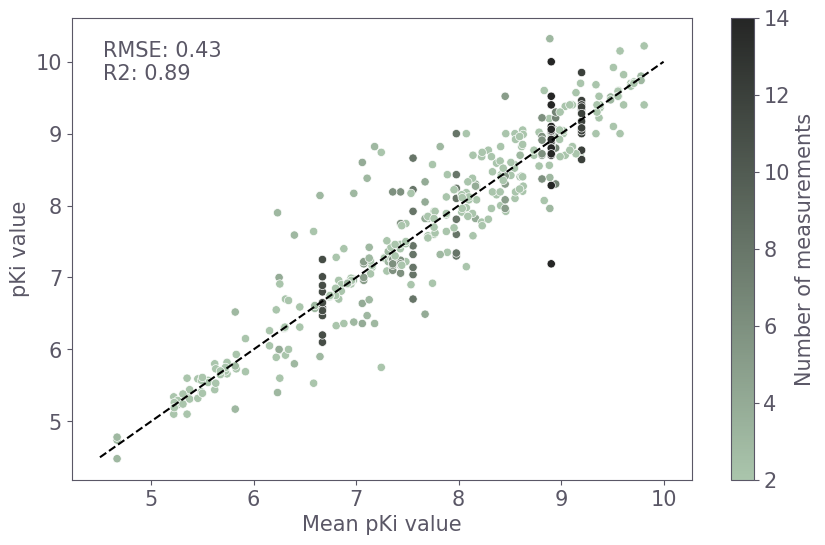

In [ ]:
# Get number of molecules with pchembl_value_N > 1
multiple_measurements = dataset[dataset['pchembl_value_N'] > 1].copy()
print(f'Number of molecules with multiple measurements: {multiple_measurements.shape[0]}')

# Extract individual pchembl_values from string pchembl_value and remove duplicates
multiple_measurements['pchembl_value'] = multiple_measurements['pchembl_value'].str.split(';').apply(lambda x: list(set(x)))
multiple_measurements = multiple_measurements[multiple_measurements['pchembl_value'].str.len() > 1]
print(f'Number of molecules with unique multiple measurements: {multiple_measurements.shape[0]}')

# Split list of pchembl_values into individual rows 
multiple_measurements = multiple_measurements.explode('pchembl_value')
multiple_measurements['pchembl_value'] = multiple_measurements['pchembl_value'].astype(float)

# Get correlation between pchembl_value and A2AR
rmse = root_mean_squared_error(multiple_measurements['pchembl_value'], multiple_measurements['A2AR'])
r2_score = r2_score(multiple_measurements['pchembl_value'], multiple_measurements['A2AR'])
print(f'Root mean square error: {rmse}')
print(f'R2 score: {r2_score}')

# plot individual measurements against median pchembl value
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=multiple_measurements, x='A2AR', y='pchembl_value', hue='pchembl_value_N', palette=sns.dark_palette(a2arcolors[1], as_cmap=True, reverse=True), ax=ax)
norm = plt.Normalize(multiple_measurements['pchembl_value_N'].min(), multiple_measurements['pchembl_value_N'].max())
ax.plot([4.5, 10], [4.5, 10], ls='--', color='black')
sm = plt.cm.ScalarMappable(cmap=sns.dark_palette(a2arcolors[1], as_cmap=True, reverse=True), norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm, label='Number of measurements', ax=ax)
plt.xlabel('Mean pKi value')
plt.ylabel('pKi value')
plt.annotate(f'RMSE: {rmse:.2f}\nR2: {r2_score:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
plt.savefig(os.path.join(A2AR_FIGURES_PATH, 'mean_pKi_vs_pKi.png'), dpi=300, bbox_inches='tight')
